In [1]:
!pip install transformers datasets evaluate

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
import evaluate
import torch
import ast

## ***Get Dataset - BigCodeBench***

In [3]:
dataset = load_dataset("bigcode/bigcodebench", split="v0.1.0_hf[:100]")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## ***Initialize Models***

In [4]:
model_names = {                               #TODO : Change Model to check improvement
    "CodeLlama": "codellama/CodeLlama-7b-hf",
}

tokenizers = {}
models = {}

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for name, model_id in model_names.items():
    tokenizers[name] = AutoTokenizer.from_pretrained(model_id)
    models[name] = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16)
    models[name] = models[name].to(device)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## ***Feedback Model***

In [6]:
def generate_feedback(evaluation_result):
    # TODO : Implement funtion for Reinforcement
    pass

In [7]:
#[IMPORTANT : Run evaluation block before running this cell]
def generate_score(prompt, model, tokenizer, data, max_length=1000):
    n = 5 #TODO : Set N based on your inplementation
    for _ in range(n):
      inputs = tokenizer(prompt, return_tensors="pt").to(device)
      output = model.generate(**inputs, max_length=max_length, top_p=0.9, do_sample=True)
      generated_code = tokenizer.decode(output[0], skip_special_tokens=True)
      evaluation_result = evaluate_code_generation(generated_code, data['test'], ast.literal_eval(data['libs']))
      prompt = generate_feedback(evaluation_result) #TODO : Implement funtion partametrs for Reinforcement
    return evaluation_result["pass_ratio"]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1


.FE.FEE...
ERROR: test_empty_list (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 28, in test_empty_list
  File "<string>", line 30, in task_func
ValueError: Please provide a non-empty list of positive integers.

ERROR: test_mixed_numbers (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 38, in test_mixed_numbers
  File "<string>", line 30, in task_func
ValueError: Please provide a non-empty list of positive integers.

ERROR: test_negative_numbers (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_negative_numbers
  File "<string>", line 30, in task_func
ValueError: Please provide a non-empty list of positive integers.

FAIL: test_default_numbers (builtins.TestCases)
--------

2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


3


...EF
ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 23, in test_case_4
  File "<string>", line 23, in <listcomp>
NameError: name 'statistics' is not defined

FAIL: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 28, in test_case_5
AssertionError: Items in the second set but not the first:
'p'
'q'
'w'
'n'
'k'
's'
't'
'd' : The dictionary should have all provided letters as keys.

----------------------------------------------------------------------
Ran 5 tests in 0.009s

FAILED (failures=1, errors=1)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



----- TEST 1 -----

----- TEST 2 -----

----- TEST 3 -----

----- TEST 4 -----

----- TEST 5 -----

----- TEST 6 -----

----- TEST 7 -----

----- TEST 8 -----

----- TEST 9 -----

----- TEST 10 -----

----- TEST 11 -----

----- TEST 12 -----

----- TEST 13 -----

----- TEST 14 -----

----- TEST 15 -----

----- TEST 16 -----
4


.....
----------------------------------------------------------------------
Ran 5 tests in 0.009s

OK
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


7


EEEEF
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 12, in test_case_1
  File "<string>", line 29, in task_func
FileNotFoundError: [Errno 2] No such file or directory: '/mock_dir/'

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 21, in test_case_2
  File "<string>", line 29, in task_func
FileNotFoundError: [Errno 2] No such file or directory: '/mock_dir/'

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/

None
8


EEEEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Trace

9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


10


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


11


FFFFFE
ERROR: test_empty_input (builtins.TestCases)
Tests behavior with an empty tuple input.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 51, in test_empty_input
NameError: name 'statistics' is not defined

FAIL: test_case_1 (builtins.TestCases)
Tests with small numbers and default range.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 13, in test_case_1
AssertionError: False is not true

FAIL: test_case_2 (builtins.TestCases)
Tests with mid-range numbers and default range.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 21,

12


FFFFF
FAIL: test_case_1 (builtins.TestCases)
Test with diverse values and the default range to ensure percentile calculation.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 10, in test_case_1
AssertionError: 7.75 != 50

FAIL: test_case_2 (builtins.TestCases)
Check consistency when the total number of elements are small but repeated.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 19, in test_case_2
AssertionError: 10.0 != 30

FAIL: test_case_3 (builtins.TestCases)
Ensure that percentile calculations are consistent for mixed low and medium values.
--------------------------------------------------------------

13


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


14


EEEEE
ERROR: test_case_1 (builtins.TestCases)
Test with default parameters and successful download.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
Test with an invalid FTP server by raising an exception on connect.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
Test with an invalid FTP user by raising an exception on login.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
Test with an invalid FTP password by raising an exception on login.
-------------------------------------------

15


EEEE
ERROR: test_archive_content (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_archive_creation (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_invalid_project_directory (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_valid_project_directory (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

----------------------------------------

16


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


17


EEEE
ERROR: test_backup_creation_and_log_file_deletion (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_handle_non_existing_directory (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_no_log_files_to_backup (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_non_log_files_remain (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

-----------

18


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


19


EEEEE
ERROR: test_invalid_file (builtins.TestCases)
Test behavior with a non-existent file path.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_large_csv (builtins.TestCases)
Test splitting and shuffling a large CSV file.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_medium_csv (builtins.TestCases)
Test splitting and shuffling a medium CSV file.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_non_csv_file (builtins.TestCases)
Test behavior with a non-CSV file.
----------------------------------------------------------------------
Traceback (mos

20


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


21


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

22


F.....
FAIL: test_memory_usage_format (builtins.TestCases)
Test that the 'Memory Usage' key is correctly formatted as a percentage.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 23, in test_memory_usage_format
AssertionError: Regex didn't match: '\\d{1,3}\\.\\d{2}%' not found in '7%'

----------------------------------------------------------------------
Ran 6 tests in 0.041s

FAILED (failures=1)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


23


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


24


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


25


EEEEE.
ERROR: test_case_1 (builtins.TestCases)
Testing with a simple password
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 16, in test_case_1
  File "<string>", line 8, in decode_and_regenerate_password
NameError: name 'base64' is not defined

ERROR: test_case_2 (builtins.TestCases)
Testing with a password containing special characters
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_case_2
  File "<string>", line 8, in decode_and_regenerate_password
NameError: name 'base64' is not defined

ERROR: test_case_3 (builtins.TestCases)
Testing with a long password
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 29, in test_case_3
  File "<string>", line 8, in decode_and_regenerate_password
NameError: name 'base64' is not defined

ERROR:

26


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_case_1
NameError: name 'json' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_case_2
NameError: name 'json' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 25, in test_case_3
NameError: name 'json' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 32, in test_case_4
NameError: name 'json' is not defined

ERROR: test_case_5 (builtins.TestCases)
------------------------------------------

27


EEEE..
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in test_case_1
  File "<string>", line 39, in task_func
  File "/usr/local/lib/python3.10/dist-packages/cryptography/fernet.py", line 40, in __init__
    raise ValueError(
ValueError: Fernet key must be 32 url-safe base64-encoded bytes.

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 12, in test_case_2
  File "<string>", line 39, in task_func
  File "/usr/local/lib/python3.10/dist-packages/cryptography/fernet.py", line 40, in __init__
    raise ValueError(
ValueError: Fernet key must be 32 url-safe base64-encoded bytes.

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 

28


EEEEE
ERROR: test_task_func_basic (builtins.TestCases)
Test the task_func function with a basic dictionary.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_task_func_basic
NameError: name 'json' is not defined

ERROR: test_task_func_empty (builtins.TestCases)
Test the task_func function with an empty dictionary.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_task_func_empty
NameError: name 'json' is not defined

ERROR: test_task_func_mixed (builtins.TestCases)
Test the task_func function with a dictionary containing mixed types of keys and values.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 52, in test_task_func_mixed
NameError: name 'json' is not defined

ERROR: test_task_func_nested (builtins.TestCases)
Test the t

29


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


30


EEE
ERROR: test_output_is_string_and_valid_base64 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in test_output_is_string_and_valid_base64
NameError: name 'np' is not defined

ERROR: test_varied_data_sets (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 28, in test_varied_data_sets
NameError: name 'np' is not defined

ERROR: test_with_mocked_scaler (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 19, in test_with_mocked_scaler
NameError: name 'np' is not defined

----------------------------------------------------------------------
Ran 3 tests in 0.003s

FAILED (errors=3)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


31


EEEEE
ERROR: test_case_invalid_email_format (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in setUp
NameError: name 'json' is not defined

ERROR: test_case_missing_attribute (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in setUp
NameError: name 'json' is not defined

ERROR: test_case_non_existent_file (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in setUp
NameError: name 'json' is not defined

ERROR: test_case_retrieve_age (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in setUp
NameError: name 'json' is not defined

ERROR: test_case_valid_json (builtins.TestCa

32


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


33


EEEEEEE
ERROR: test_empty_tag (builtins.TestCases)
Test the function with an empty tag content.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 62, in test_empty_tag
NameError: name 'Mock' is not defined

ERROR: test_h1_tag_found (builtins.TestCases)
Test retrieving the h1 tag.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/lib/python3.10/unittest/mock.py", line 1379, in patched
    return func(*newargs, **newkeywargs)
  File "<string>", line 20, in test_h1_tag_found
NameError: name 'Mock' is not defined

ERROR: test_invalid_url_handling (builtins.TestCases)
Test how the function handles an invalid URL.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", 

34


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


35


EEE.E
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in test_case_1
  File "<string>", line 39, in task_func
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 2232, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: meth(
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backends/backend_agg.py", line 509, in print_png
    self._print_pil(filename_or_obj, "png", pil_kwargs, metadata)
  File "/usr/loc

36


EEEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 10, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 15, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
--------------------------------------------------

37


EEEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 16, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 34, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
--------------------------------------------------

38


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 30, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 43, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

39


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'np' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 20, in test_case_2
NameError: name 'np' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 34, in test_case_3
NameError: name 'np' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 48, in test_case_4
NameError: name 'np' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

40


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in test_case_1
NameError: name 'np' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in test_case_2
NameError: name 'np' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_case_3
NameError: name 'np' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 14, in test_case_4
NameError: name 'np' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------

41


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


42


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


43


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'np' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 13, in test_case_2
NameError: name 'np' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in test_case_3
NameError: name 'np' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 29, in test_case_4
NameError: name 'np' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

44


EEEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceb

45


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 16, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 23, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 33, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

46


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


47


EEEEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 29, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 46, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
-------------------------------------------------

48


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


49


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

50


EE.EE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 14, in test_case_1
  File "<string>", line 50, in assert_function_output
IndexError: invalid index to scalar variable.

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 17, in test_case_2
  File "<string>", line 50, in assert_function_output
IndexError: invalid index to scalar variable.

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 28, in test_case_4
  File "<string>", line 50, in assert_function_output
IndexError: invalid index to scalar variable.

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (mo

51


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


52


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 25, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 37, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 51, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
--------------------------------------------------

53


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


54


EE.EE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py", line 939, in _finalize_columns_and_data
    columns = _validate_or_indexify_columns(contents, columns)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py", line 986, in _validate_or_indexify_columns
    raise AssertionError(
AssertionError: 4 columns passed, passed data had 5 columns

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
  File "<string>", line 42, in task_func
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 806, in __init__
    arrays, columns, index = nested_data_to_arrays(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py", line 520, in neste

55


FFFFF
FAIL: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in test_case_1
AssertionError: Tuples differ: (10, 1) != (2, 6)

First differing element 0:
10
2

- (10, 1)
+ (2, 6)

FAIL: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 19, in test_case_2
AssertionError: Tuples differ: (3, 1) != (1, 2)

First differing element 0:
3
1

- (3, 1)
+ (1, 2)

FAIL: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 28, in test_case_3
AssertionError: Tuples differ: (5, 1) != (1, 5)

First differing element 0:
5
1

- (5, 1)
+ (1, 5)

FAIL: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most re

56


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 23, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

57


.....
----------------------------------------------------------------------
Ran 5 tests in 0.012s

OK
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


58


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

59


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in test_case_1
NameError: name 'np' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 15, in test_case_2
NameError: name 'np' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 25, in test_case_3
NameError: name 'np' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 35, in test_case_4
NameError: name 'np' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

60


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


61


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

62


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


63


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


64


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


65


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 29, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 49, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 65, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

66


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


67


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in test_case_1
NameError: name 'pd' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in test_case_2
NameError: name 'pd' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 33, in test_case_3
NameError: name 'pd' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 59, in test_case_4
NameError: name 'pd' is not defined

ERROR: test_case_5 (builtins.TestCases)
---------------------------------------------------

68


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

69


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


70


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


71


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

72


EEEEE
ERROR: test_case_1 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_2 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_3 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_4 (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 8, in setUp
NameError: name 'os' is not defined

ERROR: test_case_5 (builtins.TestCases)
----------------------------------------------------------------------
Traceba

73


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


74


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


75


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


76


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


77


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


78


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


79


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


80


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


81


EEEEEE
ERROR: test_app_creation (builtins.TestCases)
Test if the function properly creates an app with given parameters.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_app_instance (builtins.TestCases)
Test if the function returns a Flask app instance.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_home_route (builtins.TestCases)
Test if the '/' route is defined correctly.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 9, in setUp
NameError: name 'tempfile' is not defined

ERROR: test_logging_info_called_with_correct_arguments (builtins.TestCases)
Test if logging.info is called with the correct JSON data.
----

82


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


83


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


84


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


85


EE.EE.EEEEE.
ERROR: test_custom_parameters (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 18, in test_custom_parameters
TypeError: object of type 'NoneType' has no len()

ERROR: test_empty_product_list (builtins.TestCases)
Test that the function can handle an empty product list.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 45, in test_empty_product_list
AttributeError: 'NoneType' object has no attribute 'empty'

ERROR: test_new_custom_parameters (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_new_custom_parameters
AttributeError: 'NoneType' object has no attribute 'apply'

ERROR: test_number_of_rows (builtins.TestCases)
--------------------------------------------------------------------

86


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


87


EEEEEE
ERROR: test_dataframe_columns (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_dataframe_columns
  File "<string>", line 40, in task_func
NameError: name 'plt' is not defined

ERROR: test_dataframe_value (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 26, in test_dataframe_value
  File "<string>", line 40, in task_func
NameError: name 'plt' is not defined

ERROR: test_different_seeds_produce_different_scores (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 21, in test_different_seeds_produce_different_scores
  File "<string>", line 40, in task_func
NameError: name 'plt' is not defined

ERROR: test_plot_labels (builtins.TestCases)
------------------------------------

88


.EE.EF
ERROR: test_different_seeds (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 27, in test_different_seeds
NameError: name 'pd' is not defined

ERROR: test_random_reproducibility (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 11, in test_random_reproducibility
NameError: name 'pd' is not defined

ERROR: test_sort_order (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 22, in test_sort_order
NameError: name 'pd' is not defined

FAIL: test_values (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 34, in test_values
AssertionError: Lists differ: ['iPhone,4', 'iPad,1', 'Macbook,3', 'Ai

89


EEEEE
ERROR: test_dataframe_structure (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 4, in setUp
NameError: name 'datetime' is not defined

ERROR: test_different_seeds_produce_different_data (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 4, in setUp
NameError: name 'datetime' is not defined

ERROR: test_random_reproducibility (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 4, in setUp
NameError: name 'datetime' is not defined

ERROR: test_sales_values_range (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 4, in setUp
NameError: name 'datetime' is not defined

ERROR: test_values (b

90


EEEEEE
ERROR: test_data_without_outliers (builtins.TestCases)
Test if outliers are correctly removed.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'np' is not defined

ERROR: test_no_change_in_data_dimension (builtins.TestCases)
Test if the dimension of the data remains unchanged.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'np' is not defined

ERROR: test_no_plotting (builtins.TestCases)
Test that the plotting function is called but does not display plots during testing.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 7, in setUp
NameError: name 'np' is not defined

ERROR: test_original_data_unchanged (builtins.TestCases)
Test if the original data remains unchanged.
---------------

91


EEEEEE
ERROR: test_correct_neighbors (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_correct_number_of_neighbors (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_invalid_k_value_negative (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_invalid_k_value_not_integer (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_large_k_value (builtins.TestCases)

92


EEEEEE
ERROR: test_empty_dataframe (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_invalid_columns (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_plot_axes (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_regression_results (builtins.TestCases)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 5, in setUp
NameError: name 'pd' is not defined

ERROR: test_return_values (builtins.TestCases)
-------------------------------------

93


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


94


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


95


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


96


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


97


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


98


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


99


EEEEEEE
ERROR: test_deterministic_output (builtins.TestCases)
Test the function with a predefined seed for reproducibility.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'random' is not defined

ERROR: test_list_length (builtins.TestCases)
Test that the length of the list is not greater than the number of unique characters.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'random' is not defined

ERROR: test_return_type (builtins.TestCases)
Test that the function returns a list.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 6, in setUp
NameError: name 'random' is not defined

ERROR: test_specific_character_count (builtins.TestCases)
Test if a specific character count is as expected base

100


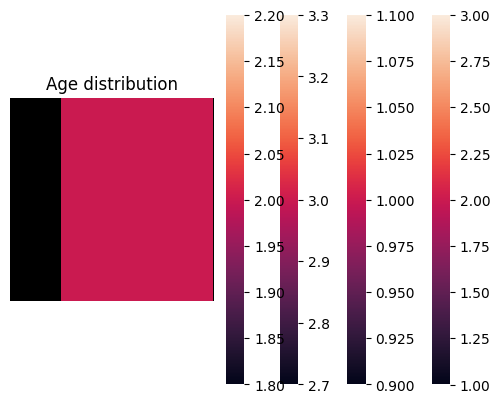

In [10]:
generated_scores = {name: [] for name in model_names}
i = 0
for example in dataset:
    i+=1
    print(i)
    prompt = example["complete_prompt"]
    print("Prompt:" + prompt)
    print("Output:")
    for model_name in model_names:
        generated_score = generate_score(prompt, models[model_name], tokenizers[model_name], example)
        generated_scores[model_name].append(generated_score)

## ***Evaluation***

In [ ]:
# # Evaluation Setup with BLEU (or CodeBLEU if available)
# bleu_metric = evaluate.load("bleu")

# # Prepare reference code for evaluation
# references = [example["canonical_solution"] for example in dataset]

# # Evaluate each model's generated code against the reference code
# evaluation_scores = {}
# for model_name, codes in generated_codes.items():
#     bleu_score = bleu_metric.compute(predictions=codes, references=references)
#     evaluation_scores[model_name] = bleu_score["bleu"]
#     print(f"{model_name} BLEU Score:", bleu_score["bleu"])

# # Print final evaluation summary
# print("\n=== Evaluation Summary ===")
# for model_name, score in evaluation_scores.items():
#     print(f"{model_name} BLEU Score: {score:.4f}")

In [9]:
import unittest
from unittest.mock import patch

def evaluate_code_generation(generated_code, test_cases_code, libraries):
    """
    Dynamically evaluates the generated code based on pass ratio and executability.

    Parameters:
    - generated_code: A string containing the code to be evaluated.
    - test_cases_code: A string containing the test cases to be executed.
    - libraries: A list of library names to import and make available in the execution context.

    Returns:
    - A dictionary containing 'pass_ratio', 'executability', and 'errors'.
    """

    # Prepare a local namespace for executing the generated code
    local_namespace = {}
    error_messages = []

    # Import libraries dynamically and add them to the namespace
    for lib in libraries:
        try:
            # Import each library and add it to the local namespace
            local_namespace[lib] = __import__(lib)
        except ImportError as e:
            error_messages.append(f"Error importing {lib}: {e}")
            return {
                'pass_ratio': 0,
                'executability': False,
                'errors': error_messages
            }

    try:
        # Execute the generated code in the provided namespace
        exec(generated_code, local_namespace, local_namespace)
        executability = True
    except Exception as e:
        error_messages.append(f"Execution Error: {e}")
        executability = False

    if not executability:
        return {
            'pass_ratio': 0,
            'executability': executability,
            'errors': error_messages
        }

    # Add task_func to local_namespace so it can be accessed by tests
    task_func = local_namespace.get('task_func')

    if not task_func:
        error_messages.append("task_func is not defined in the generated code.")
        return {
            'pass_ratio': 0,
            'executability': False,
            'errors': error_messages
        }

    # Dynamically create a TestCase class from the provided test cases code
    try:
        exec(test_cases_code, {'task_func': task_func, 'patch': patch}, local_namespace)
    except Exception as e:
        error_messages.append(f"Test case execution error: {e}")
        return {
            'pass_ratio': 0,
            'executability': False,
            'errors': error_messages
        }

    # Extract the TestCase class from the local namespace
    TestClass = local_namespace.get('TestCases')

    if not TestClass:
        error_messages.append("TestCases class not found in provided test cases code.")
        return {
            'pass_ratio': 0,
            'executability': False,
            'errors': error_messages
        }

    # Define a custom test suite
    class CustomTestSuite(unittest.TestSuite):
        def run(self, result, debug=False):
            super().run(result, debug)
            return result

    # Run the tests using unittest framework
    suite = CustomTestSuite()
    suite.addTest(unittest.makeSuite(TestClass))

    runner = unittest.TextTestRunner()

    # Capture results
    result = runner.run(suite)

    # Calculate pass ratio
    pass_ratio = (result.testsRun - len(result.failures) - len(result.errors)) / result.testsRun if result.testsRun > 0 else 0

    # Collect errors from test results
    for failure in result.failures + result.errors:
        error_messages.append(str(failure))

    # Clear the local namespace after execution
    local_namespace.clear()

    return {
        'pass_ratio': pass_ratio,
        'executability': len(result.errors) == 0,
        'errors': error_messages
    }

In [ ]:
# Example usage with dynamic inputs and libraries list
generated_code = """
import itertools
from random import shuffle

def task_func(numbers=list(range(1, 11))):
    permutations = list(itertools.permutations(numbers))
    sum_diffs = 0

    for perm in permutations:
        perm = list(perm)
        shuffle(perm)
        diffs = [abs(perm[i] - perm[i+1]) for i in range(len(perm)-1)]
        sum_diffs += sum(diffs)

    avg_sum_diffs = sum_diffs / len(permutations) if permutations else 0

    return avg_sum_diffs
"""

test_cases_code = """
import unittest

class TestCases(unittest.TestCase):

    def test_default_numbers(self):
        result = task_func()
        self.assertIsInstance(result, float)
        self.assertGreater(result, 0)

# Additional tests omitted for brevity...
"""

# List of libraries to import and use within exec()
libraries_to_import = []

# Evaluate the generated code with dynamic inputs and specified libraries
evaluation_result = evaluate_code_generation(generated_code, test_cases_code, libraries_to_import)
print(evaluation_result)

In [ ]:
#TODO : Implement a function to average teh scores from each list in generate_score which is sthe final score of the model

In [12]:
average = sum(generated_scores['CodeLlama']) / len(generated_scores['CodeLlama'])

In [13]:
average

0.05616666666666667